# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


# Reading the files into dataframes

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e3/train.csv", index_col="id")
test = pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv", index_col="id")

In [3]:
train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.739,0.400,0.500,0.006,1.000,1.000,0.000,1.204,0.903,0.699,-0.500,-0.010,0.142,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.777,0.288,0.258,0.004,0.250,1.000,1.000,2.636,0.778,1.732,0.742,-0.300,0.949,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.056,0.528,0.990,0.108,0.236,0.386,0.000,4.056,2.179,2.209,-0.011,-0.094,1.000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.720,0.333,0.333,0.004,0.375,0.931,1.000,2.322,0.778,1.431,0.667,-0.040,0.403,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.121,0.535,0.084,0.019,0.210,0.986,1.000,2.769,1.415,1.881,0.916,-0.245,1.000,0,0,0,0,0,0,1


In [4]:
test.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.388,0.490,0.327,0.009,0.565,1.000,1.000,2.841,1.114,1.663,0.673,-0.226,0.917
19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.163,0.414,0.094,0.005,0.241,1.000,1.000,2.568,0.903,1.447,0.906,-0.145,0.910
19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.061,0.623,0.476,0.015,0.600,0.750,0.000,2.461,1.322,1.322,-0.524,-0.043,0.651
19222,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.444,0.333,0.818,0.004,0.800,1.000,1.000,1.903,0.699,1.041,0.182,-0.074,0.205
19223,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.819,0.262,0.429,0.016,0.842,0.533,0.000,2.146,1.322,1.146,-0.571,-0.089,0.417


# Exploratory Data Analysis

In [5]:
train.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [6]:
train.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int64
Stains    

In [7]:
train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000,19219.000
mean,709.855,753.858,1849756.040,1846605.345,1683.988,95.655,64.124,191846.678,84.808,128.647,1459.351,0.403,0.596,76.213,0.353,0.409,0.575,0.031,0.615,0.832,0.592,2.473,1.313,1.390,0.103,-0.138,0.572,0.076,0.060,0.179,0.030,0.025,0.248,0.341
std,531.544,499.837,1903553.851,1896295.138,3730.320,177.821,101.054,442024.694,28.800,14.197,145.569,0.490,0.491,53.932,0.319,0.124,0.259,0.047,0.222,0.221,0.482,0.761,0.468,0.406,0.488,0.120,0.332,0.265,0.237,0.383,0.169,0.157,0.432,0.474
min,0.000,4.000,6712.000,6724.000,6.000,2.000,1.000,250.000,0.000,39.000,1227.000,0.000,0.000,40.000,0.000,0.000,0.008,0.002,0.014,0.105,0.000,0.778,0.301,0.000,-0.988,-0.885,0.119,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,49.000,214.000,657468.000,657502.000,89.000,15.000,14.000,9848.000,70.000,124.000,1358.000,0.000,0.000,40.000,0.059,0.318,0.376,0.007,0.452,0.655,0.000,1.949,1.000,1.079,-0.273,-0.193,0.253,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,777.000,796.000,1398169.000,1398179.000,168.000,25.000,23.000,18238.000,90.000,127.000,1364.000,0.000,1.000,69.000,0.238,0.413,0.545,0.009,0.636,0.964,1.000,2.228,1.146,1.322,0.111,-0.143,0.473,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1152.000,1165.000,2368032.000,2362511.000,653.000,64.000,61.000,67978.000,105.000,135.000,1652.000,1.000,1.000,80.000,0.656,0.495,0.818,0.019,0.786,1.000,1.000,2.815,1.431,1.708,0.529,-0.084,0.999,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,1705.000,1713.000,12987661.000,12987692.000,152655.000,7553.000,903.000,11591414.000,196.000,253.000,1794.000,1.000,1.000,300.000,0.995,0.927,1.000,0.665,1.000,1.000,1.000,4.554,2.997,4.033,0.992,0.642,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# Handling Categorical variables

In [8]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
train[["TypeOfSteel_A300","TypeOfSteel_A400","Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].nunique()

TypeOfSteel_A300    2
TypeOfSteel_A400    2
Pastry              2
Z_Scratch           2
K_Scatch            2
Stains              2
Dirtiness           2
Bumps               2
Other_Faults        2
dtype: int64

In [10]:
cat_cols = ["TypeOfSteel_A300","TypeOfSteel_A400"] #,"Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"

for col in cat_cols:
    train[col] = train[col].astype('category', copy=False)
    
train.dtypes

X_Minimum                   int64
X_Maximum                   int64
Y_Minimum                   int64
Y_Maximum                   int64
Pixels_Areas                int64
X_Perimeter                 int64
Y_Perimeter                 int64
Sum_of_Luminosity           int64
Minimum_of_Luminosity       int64
Maximum_of_Luminosity       int64
Length_of_Conveyer          int64
TypeOfSteel_A300         category
TypeOfSteel_A400         category
Steel_Plate_Thickness       int64
Edges_Index               float64
Empty_Index               float64
Square_Index              float64
Outside_X_Index           float64
Edges_X_Index             float64
Edges_Y_Index             float64
Outside_Global_Index      float64
LogOfAreas                float64
Log_X_Index               float64
Log_Y_Index               float64
Orientation_Index         float64
Luminosity_Index          float64
SigmoidOfAreas            float64
Pastry                      int64
Z_Scratch                   int64
K_Scatch      

In [11]:
ce_OHE = ce.OneHotEncoder(cols=['TypeOfSteel_A300','TypeOfSteel_A400'])
train = ce_OHE.fit_transform(train)
test = ce_OHE.fit_transform(test)

In [12]:
train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300_1,TypeOfSteel_A300_2,TypeOfSteel_A400_1,TypeOfSteel_A400_2,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,1358,1,0,1,0,50,0.739,0.400,0.500,0.006,1.000,1.000,0.000,1.204,0.903,0.699,-0.500,-0.010,0.142,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,0,1,0,1,80,0.777,0.288,0.258,0.004,0.250,1.000,1.000,2.636,0.778,1.732,0.742,-0.300,0.949,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,1,0,1,0,40,0.056,0.528,0.990,0.108,0.236,0.386,0.000,4.056,2.179,2.209,-0.011,-0.094,1.000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,1,0,1,0,40,0.720,0.333,0.333,0.004,0.375,0.931,1.000,2.322,0.778,1.431,0.667,-0.040,0.403,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,1,0,1,0,300,0.121,0.535,0.084,0.019,0.210,0.986,1.000,2.769,1.415,1.881,0.916,-0.245,1.000,0,0,0,0,0,0,1


In [13]:
test.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300_1,TypeOfSteel_A300_2,TypeOfSteel_A400_1,TypeOfSteel_A400_2,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,1,0,1,0,150,0.388,0.490,0.327,0.009,0.565,1.000,1.000,2.841,1.114,1.663,0.673,-0.226,0.917
19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,1,0,1,0,40,0.163,0.414,0.094,0.005,0.241,1.000,1.000,2.568,0.903,1.447,0.906,-0.145,0.910
19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,1,0,1,0,40,0.061,0.623,0.476,0.015,0.600,0.750,0.000,2.461,1.322,1.322,-0.524,-0.043,0.651
19222,158,168,232415,232440,80,10,11,8586,107,140,1690,0,1,0,1,100,0.444,0.333,0.818,0.004,0.800,1.000,1.000,1.903,0.699,1.041,0.182,-0.074,0.205
19223,559,592,544375,544389,140,19,15,15524,103,134,1688,0,1,0,1,60,0.819,0.262,0.429,0.016,0.842,0.533,0.000,2.146,1.322,1.146,-0.571,-0.089,0.417


# Checking the Data Distribution

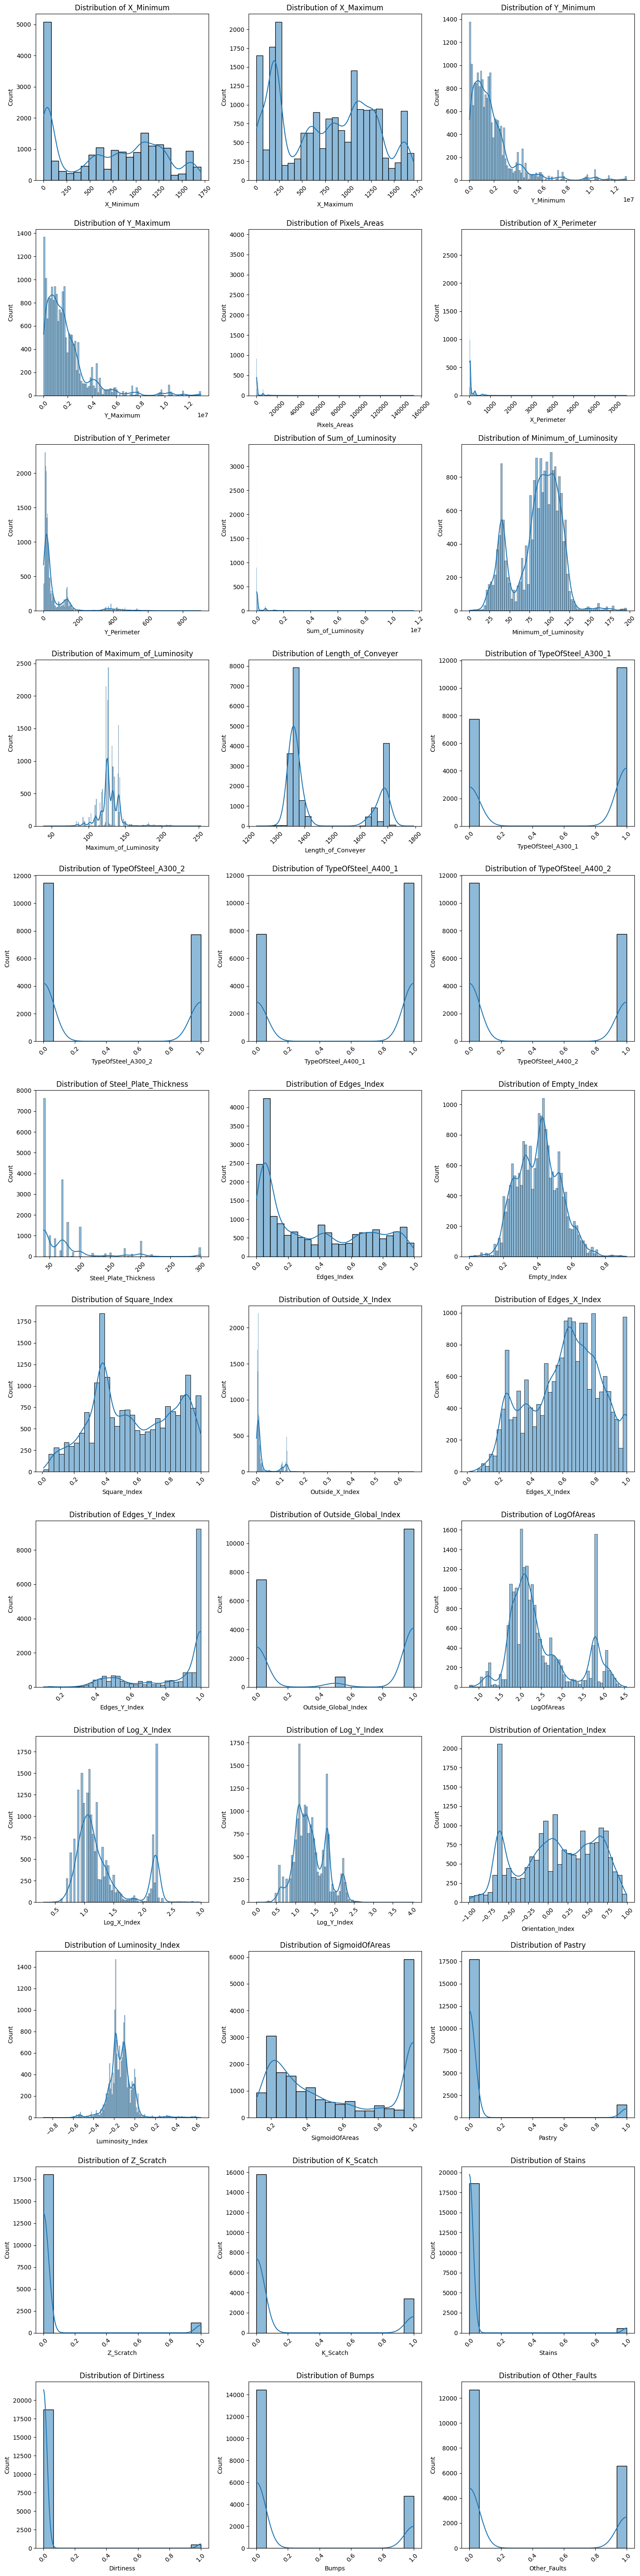

In [14]:
numerical_cols = train.select_dtypes(include=['int', 'float']).columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns

num_cols = 3
num_numerical_plots = len(numerical_cols)
num_categorical_plots = len(categorical_cols)
num_rows = (num_numerical_plots + num_categorical_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, col in enumerate(numerical_cols):
    sns.histplot(data=train, x=col, kde=True, ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(f'Distribution of {col}')
    axes[i // num_cols, i % num_cols].tick_params(axis='x', rotation=45)
    
for i, col in enumerate(categorical_cols, start=num_numerical_plots):
    sns.countplot(data=train, x=col, ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(f'Distribution of {col}')
    axes[i // num_cols, i % num_cols].tick_params(axis='x', rotation=45)

for j in range(num_numerical_plots + num_categorical_plots, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])
    
plt.tight_layout()
plt.show()

# Handling the Outliers

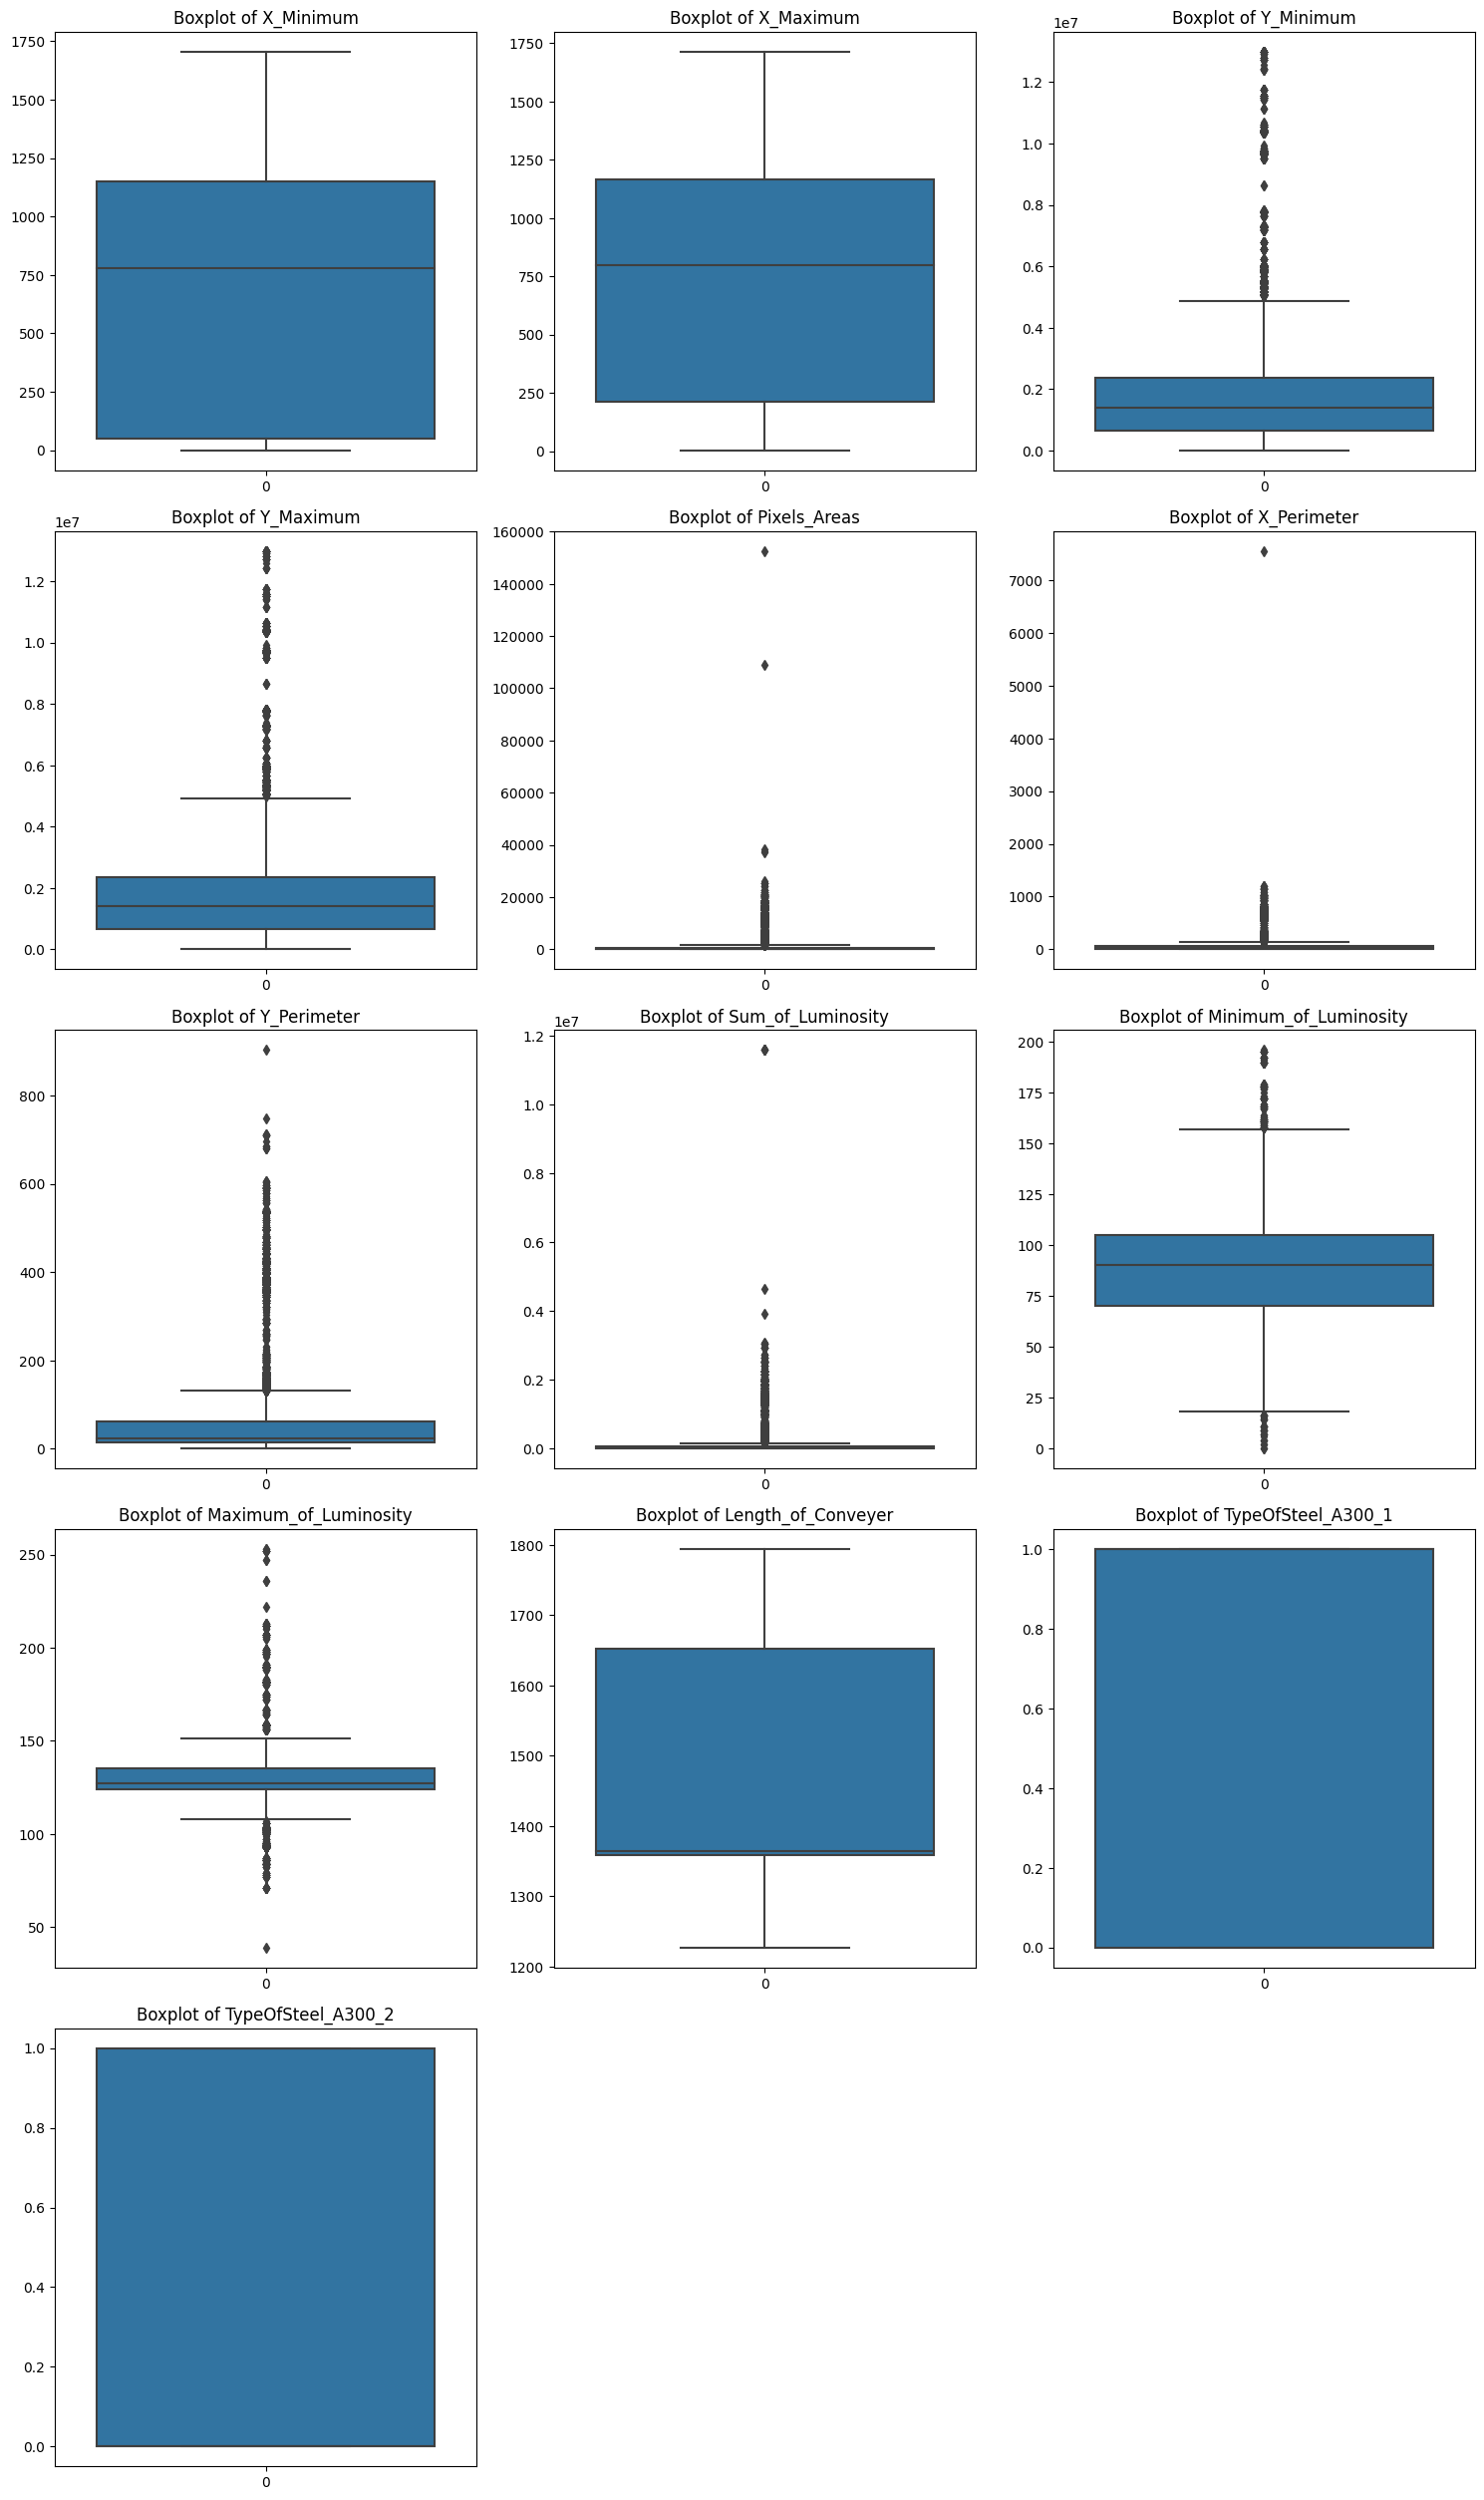

In [15]:
num_cols = 3
num_rows = (len(train.columns)) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, col in enumerate(train.select_dtypes(include=['int', 'float']).columns):
    sns.boxplot(data=train[col], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(f'Boxplot of {col}')

for j in range(num_rows, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])
    
plt.tight_layout()
plt.show()

In [16]:
def droprows(train, data):
    for col in data:
        df = train[col].nlargest(data[col])
        result = train[train[col].isin(df)]
        train = train.drop(result.index)
    return train

In [17]:
data = {'Pixels_Areas': 2,
        'X_Perimeter': 1,
        'Y_Perimeter': 1,
        'Sum_of_Luminosity': 1,
        'Steel_Plate_Thickness': 1,
       }

train = droprows(train, data)

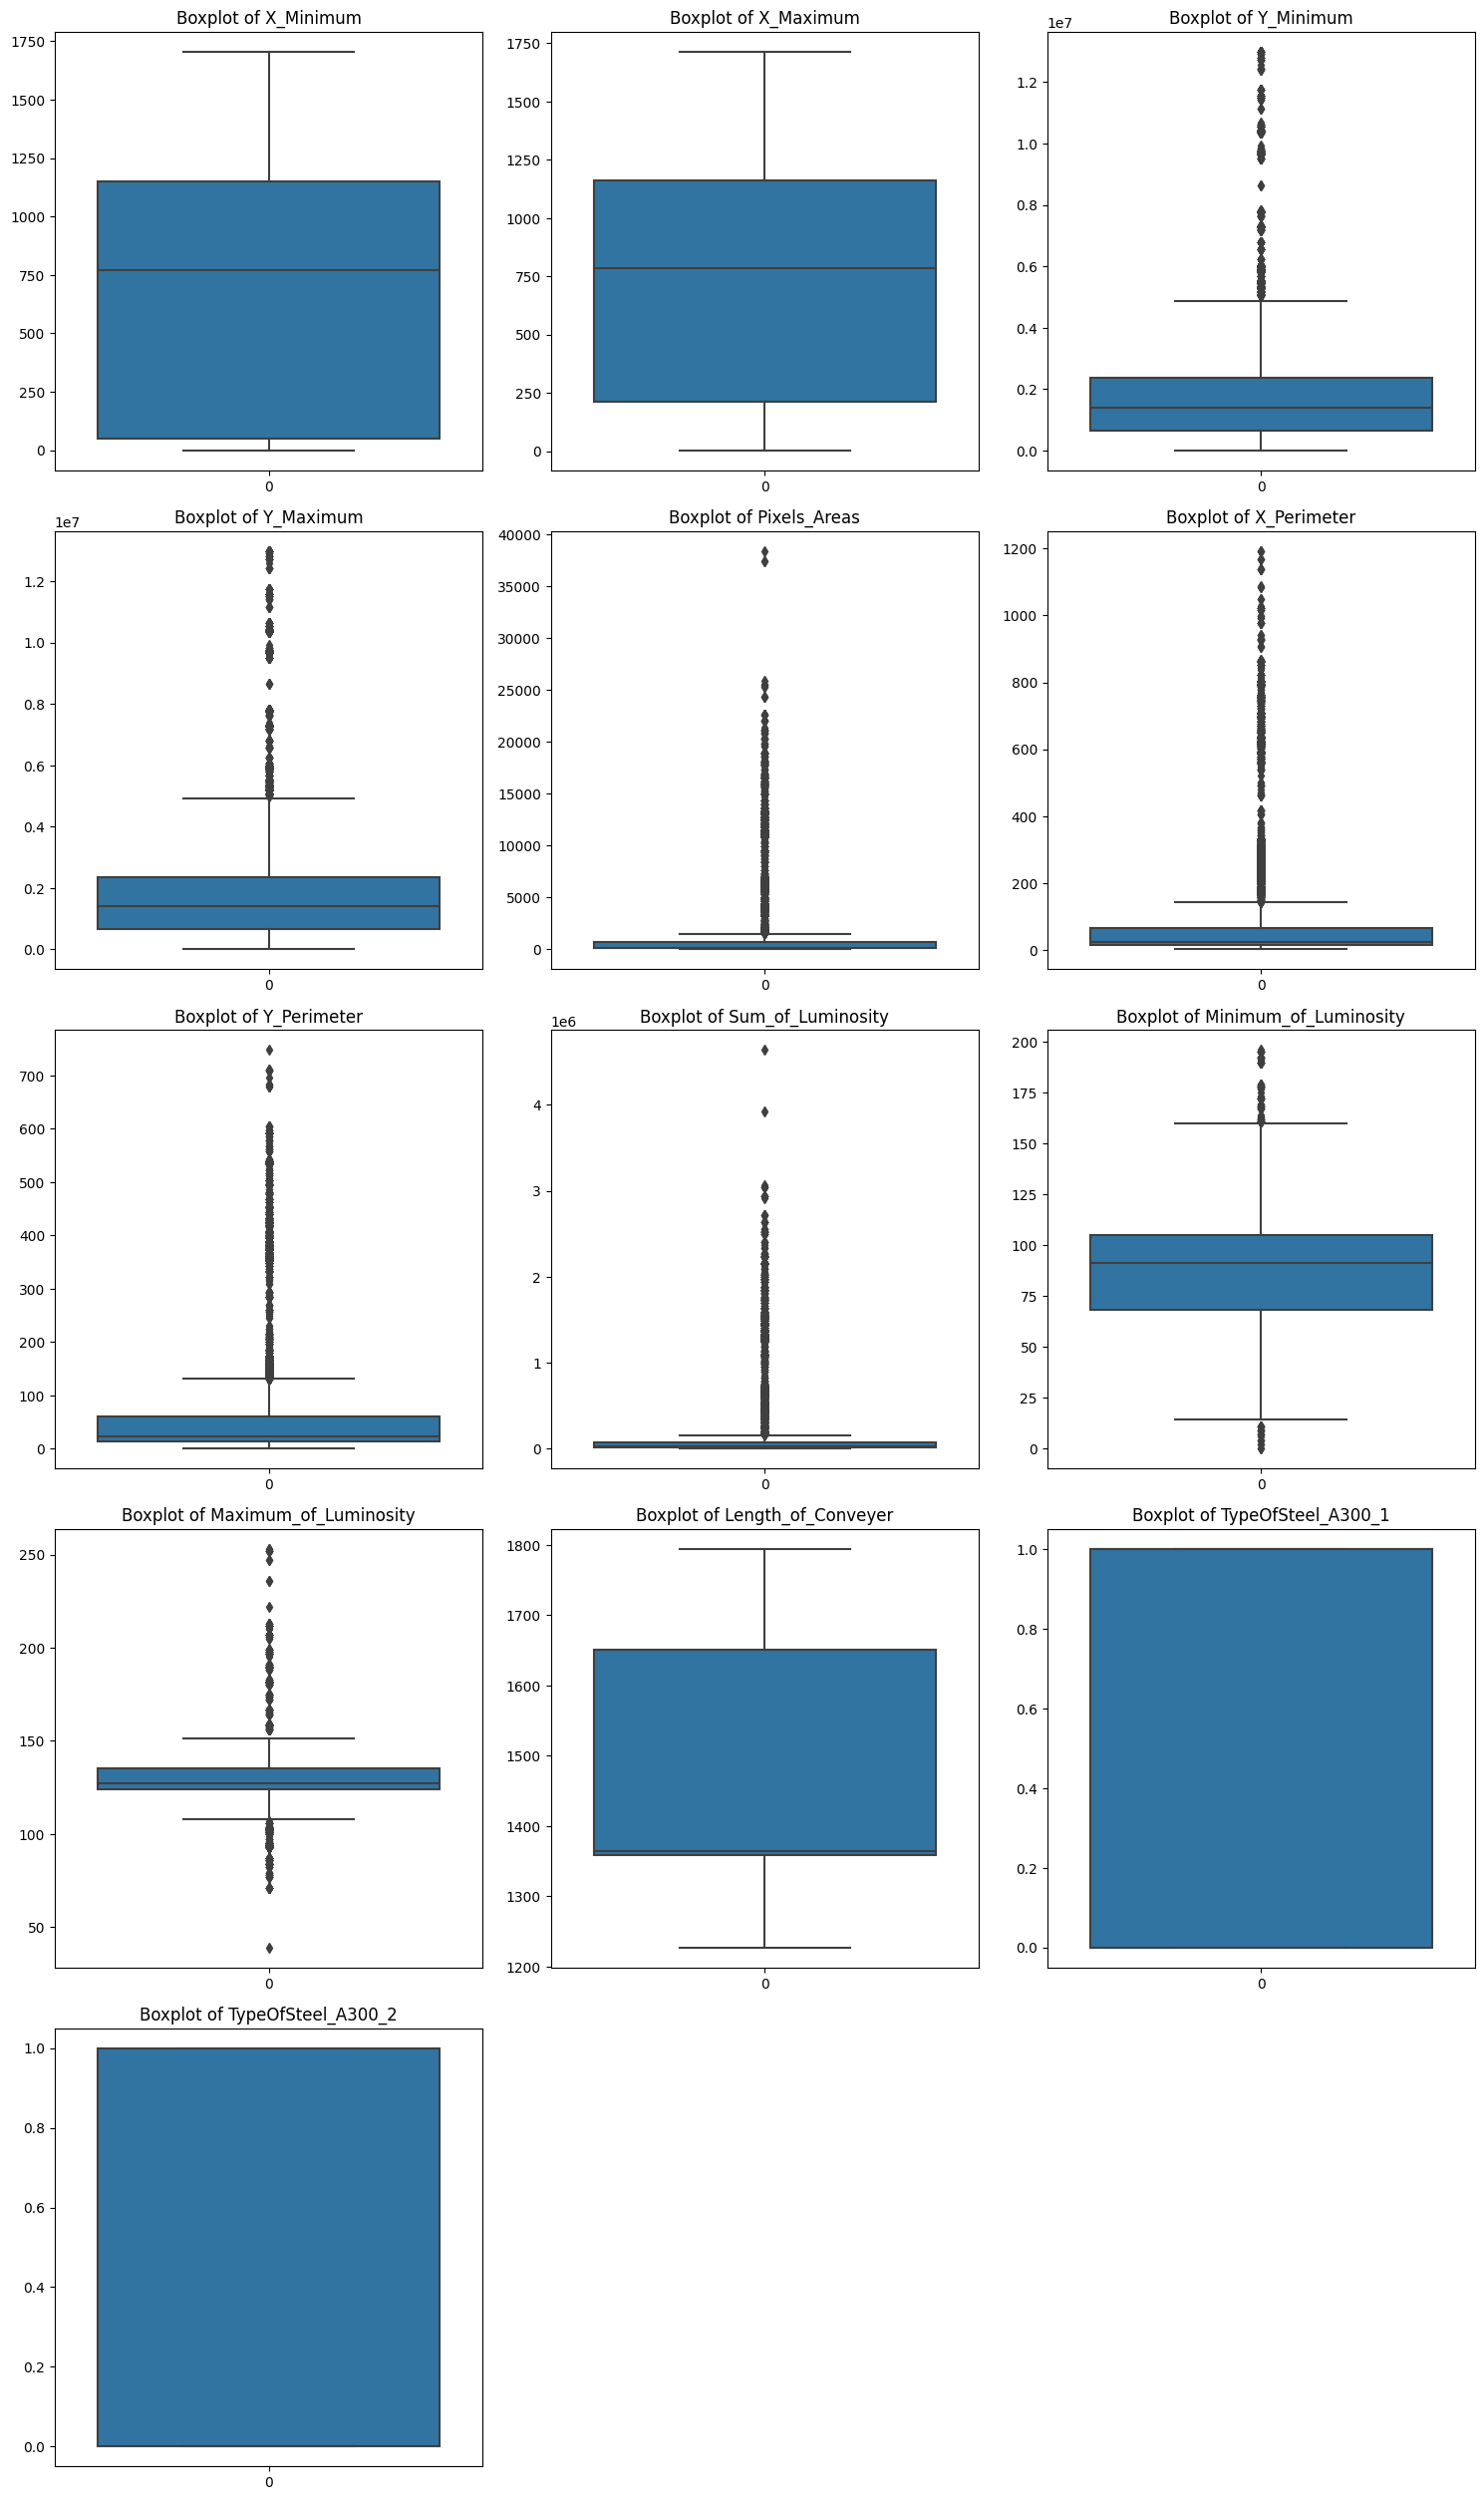

In [18]:
num_cols = 3
num_rows = (len(train.columns)) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, col in enumerate(train.select_dtypes(include=['int', 'float']).columns):
    sns.boxplot(data=train[col], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(f'Boxplot of {col}')

for j in range(num_rows, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])
    
plt.tight_layout()
plt.show()

# Splitting the Data

In [19]:
target_cols = pd.DataFrame()
target_cols[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]] = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]]

# Drop copied columns from df1
train.drop(columns=["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], inplace=True)

In [20]:
target_cols.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1


In [21]:
train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300_1,TypeOfSteel_A300_2,TypeOfSteel_A400_1,TypeOfSteel_A400_2,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,1358,1,0,1,0,50,0.739,0.400,0.500,0.006,1.000,1.000,0.000,1.204,0.903,0.699,-0.500,-0.010,0.142
1,808,816,728350,728372,433,20,54,44478,70,111,1687,0,1,0,1,80,0.777,0.288,0.258,0.004,0.250,1.000,1.000,2.636,0.778,1.732,0.742,-0.300,0.949
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,1,0,1,0,40,0.056,0.528,0.990,0.108,0.236,0.386,0.000,4.056,2.179,2.209,-0.011,-0.094,1.000
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,1,0,1,0,40,0.720,0.333,0.333,0.004,0.375,0.931,1.000,2.322,0.778,1.431,0.667,-0.040,0.403
5,1009,1033,899231,899307,409,22,26,47513,86,118,1650,0,1,0,1,70,0.276,0.414,0.409,0.005,0.545,1.000,1.000,2.612,0.954,1.415,0.591,-0.189,0.875


In [22]:
def split(train, col):
        x_train, x_val, y_train, y_val = train_test_split(train, target_cols[col], test_size=0.3, stratify=target_cols[col], random_state=100)
        return x_train, x_val, y_train, y_val

# Scaling the data

In [23]:
def scaled(x_train, x_val, test):
    scaler = MinMaxScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    x_val_scaled = scaler.transform(x_val)
    test_scaled = scaler.transform(test)
    return x_train_scaled, x_val_scaled, test_scaled

# Model Development using Cross Validation and Evaluation

In [24]:
clf = []
submission_df = pd.DataFrame()

def check(train, target_cols):
    for col in target_cols.columns:
        x_train, x_val, y_train, y_val = split(train,col)
        x_train_scaled, x_val_scaled, test_scaled = scaled(x_train, x_val, test)
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

        rf_classifier.fit(x_train_scaled, y_train)
        clf.append(rf_classifier)

        train_accuracy = cross_val_score(rf_classifier, x_train_scaled, y_train, cv=5, scoring='roc_auc').mean()

        val_accuracy = accuracy_score(y_val, rf_classifier.predict(x_val_scaled))
        y_pred = rf_classifier.predict(test_scaled)
        submission_df[col] = y_pred

        print(f"Column: {col} Training Accuracy:", train_accuracy)
        print(f"Column: {col} Validation Accuracy:", val_accuracy)
    return submission_df

In [25]:
from sklearn.metrics import roc_auc_score

clf = []
submission_df = pd.DataFrame()

def check(train, target_cols):
    for col in target_cols.columns:
        x_train, x_val, y_train, y_val = split(train, col)
        x_train_scaled, x_val_scaled, test_scaled = scaled(x_train, x_val, test)
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

        rf_classifier.fit(x_train_scaled, y_train)
        clf.append(rf_classifier)

        # Calculate AUC using cross-validation
        train_auc = cross_val_score(rf_classifier, x_train_scaled, y_train, cv=5, scoring='roc_auc').mean()

        # Calculate AUC for validation set
        y_pred_proba = rf_classifier.predict_proba(x_val_scaled)[:, 1]
        val_auc = roc_auc_score(y_val, y_pred_proba)

        # Predict for test set
        y_pred = rf_classifier.predict(test_scaled)
        submission_df[col] = y_pred

        print(f"Column: {col} Training AUC:", train_auc)
        print(f"Column: {col} Validation AUC:", val_auc)

    return submission_df

In [26]:
submission_df = check(train, target_cols)

Column: Pastry Training AUC: 0.852430446170416
Column: Pastry Validation AUC: 0.8415113523122087
Column: Z_Scratch Training AUC: 0.941391711421726
Column: Z_Scratch Validation AUC: 0.9346177564669103
Column: K_Scatch Training AUC: 0.9821382749135603
Column: K_Scatch Validation AUC: 0.983812972453271
Column: Stains Training AUC: 0.9889728784184415
Column: Stains Validation AUC: 0.9863681881319248
Column: Dirtiness Training AUC: 0.8553906306160137
Column: Dirtiness Validation AUC: 0.8522392006234691
Column: Bumps Training AUC: 0.7869123955415243
Column: Bumps Validation AUC: 0.7942611939723074
Column: Other_Faults Training AUC: 0.6751217572355503
Column: Other_Faults Validation AUC: 0.6736734407371641


In [27]:
submission_df.to_csv("submission.csv", index=False)